In [2]:
import pandas
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

 #import line2d
 

# Plot config

In [3]:
# Using seaborn's style
plt.style.use('default')

font_config = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.titlesize": 14,
}

# Set default color cycle
custom_cycle = ['#004791', '#4DA060', '#E86A58', '#FFBE00']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_cycle)

plt.rcParams.update(font_config)

def set_size(width = 232, fraction=1, squeeze_height=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'full':
        width_pt = 484
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1]) * squeeze_height

    return (fig_width_in, fig_height_in)

# AR vs $\tau$

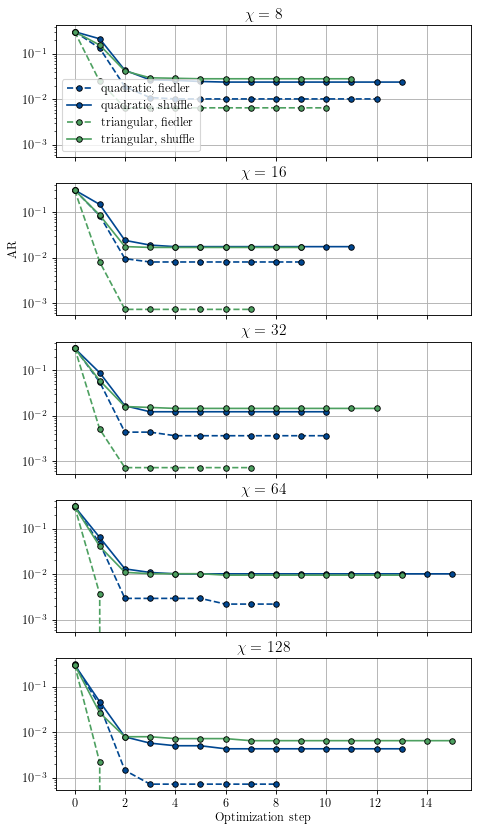

In [4]:
graph_type = "3Reg"
Nvertices = 100
num_instances = 10

fig, ax = plt.subplots(5, 1, sharex=True, sharey=True)
for i, chi in enumerate([8, 16, 32, 64, 128]):
    for architecture in ["quadratic", "triangular"]:
        for qubit_ordering in ["fiedler", "shuffle"]:
            best_energy_list = []
            avg_energy_list = []

            for idx in range(num_instances):
                data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
                with h5py.File(data_path, "r") as data:
                    samples = data["energy_samples"][:]
                    best_sample = samples.min(axis=1)
                    best_energy_list.append(best_sample)
                    avg_energy = samples.mean(axis=1)
                    avg_energy_list.append(avg_energy)

            best_energy = pandas.DataFrame(best_energy_list).T
            avg_energy = pandas.DataFrame(avg_energy_list).T

            gurobi_path = os.path.join("../..", "gurobi_results", "MaxCut", graph_type, f"{Nvertices}v", "gurobi_costs.csv")
            gurobi_cost = pandas.read_csv(gurobi_path)[:num_instances]

            # fill best_energy DataFrame such that each col has same length, by fillins NAns with the last value in that col, use padding
            best_energy = best_energy.ffill().cummin()
            avg_energy = avg_energy.ffill()

            # get AR by dividing col i by gurobi_cost["cost"][i]
            #print(best_energy.shape)
 
            best_AR = best_energy / gurobi_cost["cost"].values
            avg_AR = avg_energy / gurobi_cost["cost"].values

            # Plot linestyle - / -- for triangular, : for quadratic
            if architecture == "triangular":
                color = "C1"
            else:
                color = "C0"

            # Plot C0 / C1 color - blue for fiedler, orange for shuffle
            if qubit_ordering == "fiedler":
                linestyle = "--"
            else:
                linestyle = "-"

            ax[i].semilogy(1-best_AR.mean(axis=1), color=color, marker="o", linestyle=linestyle, markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            #ax[i].fill_between(range(len(best_AR)), 1-best_AR.max(axis=1), 1-best_AR.min(axis=1), alpha=0.2)
            #ax[i].errorbar(range(len(best_AR)), best_AR.mean(axis=1), yerr=best_AR.std(axis=1), fmt='o', linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            ax[i].set_title(f"$\\chi = {chi}$")
            ax[i].grid(True)
            #ax[i].set_ylim(-0.1, .3)

        #ax[1].plot(avg_energy.mean(axis=1) / gurobi_cost["cost"].values.mean(), marker="o", linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")

plt.xlabel("Optimization step")
ax[1].set_ylabel("AR")
ax[0].legend(loc = "lower left")
#plt.grid()
# increase padding
fig.set_size_inches(set_size(width='full', fraction=1, subplots=(3, 1)))
fig.set_dpi(80)


0.04964124128113523
0.03044305616074272
0.03850162387134115
0.014124815468955054
0.03832215019051066
0.010705369164921819
0.02187956099992261
0.006058606343130046
0.01545554044295483
0.0030318375404136955


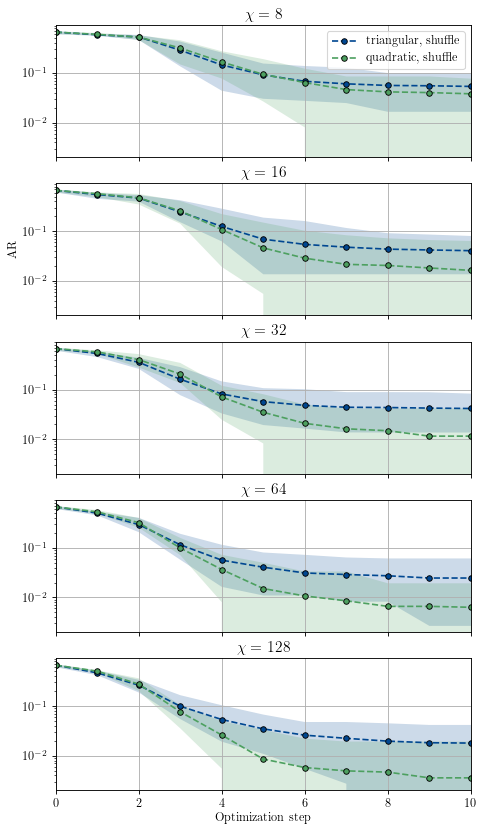

In [5]:
Nvertices = 100
num_instances = 10

fig, ax = plt.subplots(5, 1, sharex=True, sharey=True)
for i, chi in enumerate([8, 16, 32, 64, 128]):
    for architecture in ["triangular", "quadratic"]:
        for qubit_ordering in ["shuffle"]:
            best_energy_list = []
            avg_energy_list = []

            for idx in range(num_instances):
                data_path = os.path.join("../..", "results", "sk_model", f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
                with h5py.File(data_path, "r") as data:
                    samples = data["energy_samples"][:]
                    best_sample = samples.min(axis=1)
                    best_energy_list.append(best_sample)
                    avg_energy = samples.mean(axis=1)
                    avg_energy_list.append(avg_energy)

            best_energy = pandas.DataFrame(best_energy_list).T
            avg_energy = pandas.DataFrame(avg_energy_list).T

            gurobi_path = os.path.join("../..", "gurobi_results", "sk_model", f"{Nvertices}v", "gurobi_costs.csv")
            gurobi_cost = pandas.read_csv(gurobi_path)[:num_instances]

            # fill best_energy DataFrame such that each col has same length, by fillins NAns with the last value in that col, use padding
            best_energy = best_energy.ffill().cummin()
            avg_energy = avg_energy.ffill()

            # get AR by dividing col i by gurobi_cost["cost"][i]
            #print(best_energy.shape)
            best_AR = best_energy / gurobi_cost["cost"].values
            avg_AR = avg_energy / gurobi_cost["cost"].values


            print(1-best_AR.iloc[-1, :].mean())

            ax[i].semilogy(1-best_AR.mean(axis=1), marker="o", linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            ax[i].fill_between(range(len(best_AR)), 1-best_AR.min(axis=1), 1-best_AR.max(axis=1), alpha=0.2)
            #ax[i].errorbar(range(len(best_AR)), best_AR.mean(axis=1), yerr=best_AR.std(axis=1), fmt='o', linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            ax[i].set_title(f"$\\chi = {chi}$")
            ax[i].grid(True)
            ax[i].set_xlim(0, 10)

        #ax[1].plot(avg_energy.mean(axis=1) / gurobi_cost["cost"].values.mean(), marker="o", linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")

plt.xlabel("Optimization step")
ax[1].set_ylabel("AR")
ax[0].legend(loc = "upper right")
#plt.grid()
# increase padding
fig.set_size_inches(set_size(width='full', fraction=1, subplots=(3, 1)))
fig.set_dpi(80)

# AR vs $\chi$

/tmp/ipykernel_3147937/888900865.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([8, 16, 32, 64, 128])


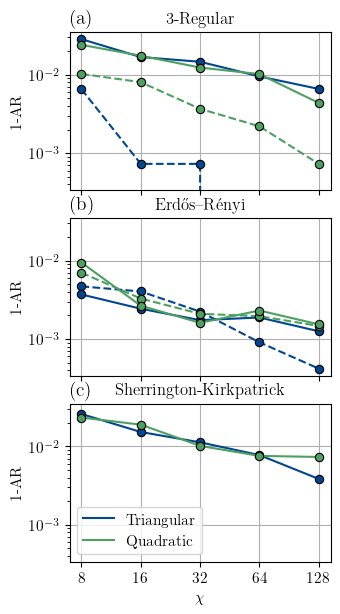

In [6]:
from matplotlib.lines import Line2D


Nvertices = 100
num_instances = 10
chi_list = [8, 16, 32, 64, 128]

graph_types = ["MaxCut/3Reg", "MaxCut/ER", "MaxCut/SK"]
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
for col, graph_type in enumerate(graph_types):

    for row, architecture in enumerate(["triangular", "quadratic"]):
        for qubit_ordering in ["fiedler", "shuffle"]:

            if qubit_ordering == "fiedler" and graph_type == "MaxCut/SK":
                continue

            avg_final_AR_list = np.zeros(len(chi_list))
            std_final_AR_list = np.zeros(len(chi_list))
            for i, chi in enumerate(chi_list):
                best_energy_list = []

                for idx in range(num_instances):
                    data_path = os.path.join("../..", "results", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
                    with h5py.File(data_path, "r") as data:
                        samples = data["energy_samples"][:]
                        best_sample = samples.min(axis=1)
                        best_energy_list.append(best_sample)
                        avg_energy = samples.mean(axis=1)
                        avg_energy_list.append(avg_energy)

                energy = pandas.DataFrame(best_energy_list).T

                gurobi_path = os.path.join("../..", "gurobi_results", graph_type, f"{Nvertices}v", "gurobi_costs.csv")
                gurobi_cost = pandas.read_csv(gurobi_path)[:num_instances]

                # fill best_energy DataFrame such that each col has same length, by fillins NAns with the last value in that col, use padding
                energy = energy.ffill().cummin()

                final_AR = (energy / gurobi_cost["cost"].values).iloc[-1, :]
                #ax.boxplot(final_AR, positions=[i+1], widths=0.6)

                # get AR by dividing col i by gurobi_cost["cost"][i]
                avg_final_AR = (energy / gurobi_cost["cost"].values).iloc[-1, :].mean()
                std_final_AR = (energy / gurobi_cost["cost"].values).iloc[-1, :].std()
                avg_final_AR_list[i] = avg_final_AR
                std_final_AR_list[i] = std_final_AR

                #print(final_AR)

            # Plot C0 / C1 color - blue for quadratic , orange for triangular
            if architecture == "quadratic":
                color = "C1"
            else:
                color = "C0"

            # Plot - / -- for fiedler, : for shuffle
            if qubit_ordering == "fiedler":
                linestyle = "--"
            else:
                linestyle = "-"

            ax[col].semilogy(
                1-avg_final_AR_list,
                linestyle=linestyle,
                color=color,
                markeredgecolor="black",
                marker="o",
                markersize=6,
                markeredgewidth=.8,
                label =f"{architecture}"
            )
            ax[col].grid(True)

ax[0].set_title("3-Regular", fontsize=12)
ax[1].set_title("Erdős–Rényi", fontsize=12)
ax[2].set_title("Sherrington-Kirkpatrick", fontsize=12)

ax[0].set_title("(a)", loc='left')
ax[1].set_title("(b)", loc='left')
ax[2].set_title("(c)", loc='left')

ax[2].set_xlabel(r"$\chi$")
ax[2].set_ylabel("1-AR")
ax[0].set_ylabel("1-AR")
ax[1].set_ylabel("1-AR")

ax[1].set_xticklabels([8, 16, 32, 64, 128])
ax[1].set_xticks([0, 1, 2, 3, 4])

legend_elements = [
    Line2D([0], [0], color='C0', linestyle='-', label='Triangular'),
    Line2D([0], [0], color='C1', linestyle='-', label='Quadratic')
]
ax[2].legend(handles=legend_elements, loc='lower left')

fig.set_size_inches(set_size(fraction=1, subplots=(3, 1)))
fig.set_dpi(100)
fig.tight_layout(pad=.01)

# save as pdf
fig.savefig("paper_figures/AR_architechture_MC.pdf", bbox_inches='tight')

# AR vs $\tau$

In [ ]:
Nvertices = 100
num_instances = 10
chi = 128
graph_types = ["MaxCut/3Reg", "MaxCut/ER", "MaxCut/SK"]

fig, ax = plt.subplots(3, 1, sharey=True)
for i, graph_type in enumerate(graph_types):
    for architecture in ["triangular", "quadratic"]:
        for qubit_ordering in ["shuffle", "fiedler"]:
            if qubit_ordering == "fiedler" and graph_type == "MaxCut/SK":
                continue
            
            best_energy_list = []
            avg_energy_list = []

            for idx in range(num_instances):
                data_path = os.path.join("../..", "results", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
                with h5py.File(data_path, "r") as data:
                    samples = data["energy_samples"][:]
                    best_sample = samples.min(axis=1)
                    best_energy_list.append(best_sample)
                    avg_energy = samples.mean(axis=1)
                    avg_energy_list.append(avg_energy)

            best_energy = pandas.DataFrame(best_energy_list).T
            avg_energy = pandas.DataFrame(avg_energy_list).T

            gurobi_path = os.path.join("../..", "gurobi_results", graph_type, f"{Nvertices}v", "gurobi_costs.csv")
            gurobi_cost = pandas.read_csv(gurobi_path)[:num_instances]

            # fill best_energy DataFrame such that each col has same length, by fillins NAns with the last value in that col, use padding
            best_energy = best_energy.ffill().cummin()

            # get AR by dividing col i by gurobi_cost["cost"][i]
            best_AR = best_energy / gurobi_cost["cost"].values

            if architecture == "quadratic":
                color = "C1"
            else:
                color = "C0"

            # Plot - / -- for fiedler, : for shuffle
            if qubit_ordering == "fiedler":
                linestyle = "--"
            else:
                linestyle = "-"


            ax[i].semilogy(1-best_AR.mean(axis=1), color=color, linestyle=linestyle, markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}")
            #ax[i].fill_between(range(len(best_AR)), 1-best_AR.min(axis=1), 1-best_AR.max(axis=1), alpha=0.2)
            #ax[i].errorbar(range(len(best_AR)), best_AR.mean(axis=1), yerr=best_AR.std(axis=1), fmt='o', linestyle="--", markeredgecolor="black", markersize=5, markeredgewidth=.8, label=f"{architecture}, {qubit_ordering}")
            ax[i].set_title(graph_type)
            ax[i].grid(True)
            

ax[0].set_title("3-Regular", fontsize=12)
ax[1].set_title("Erdős–Rényi", fontsize=12)
ax[2].set_title("Sherrington-Kirkpatrick", fontsize=12)

ax[0].set_title("(a)", loc='left')
ax[1].set_title("(b)", loc='left')
ax[2].set_title("(c)", loc='left')

ax[0].set_ylabel("1-AR")
ax[1].set_ylabel("1-AR")
ax[2].set_ylabel("1-AR")

ax[2].set_xlabel("Step")

legend_elements = [
    Line2D([0], [0], color='C0', linestyle='-', label='Triangular'),
    Line2D([0], [0], color='C1', linestyle='-', label='Quadratic')
]
ax[0].legend(handles=legend_elements, loc='upper right')

fig.set_size_inches(set_size(fraction=1, subplots=(3, 1)))
fig.set_dpi(100)

# Increase padding between subplots
fig.tight_layout(pad=.1)

# save as pdf
fig.savefig("paper_figures/AR_vs_tau.pdf", bbox_inches='tight')

# Distribution vs $\tau$

1
10
19
28


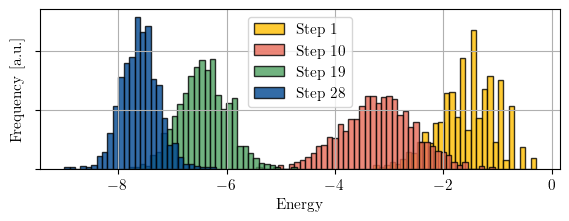

In [ ]:
data_path = "../../results/MaxCut/SK/100v/MPS_fix_dt/ising_graph0_triangular_chi128_shuffle/results.h5"
data_path = "../../results/portfolio/MPS_dtau10/ising_Ns10_Nt9_Nq2_K10_gamma1_zeta0.042_rho1.0_triangular_chi128_fiedler/results.h5"

with h5py.File(data_path, "r") as data:
    samples = data["energy_samples"][:]

# for each row, plot histogram of the values in that row in a single figure
fig, ax = plt.subplots(1, 1)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for idx, i in enumerate(range(1, 32, 9)):
    print(i)
    min_val = samples[i, :].min()
    max_val = samples[i, :].max()
    bins = np.arange(min_val, max_val + 0.1, 0.1) 
    color = colors[::-1][idx % len(colors)]
    ax.hist(samples[i, :], bins=bins, density=True, alpha=.8, edgecolor='black', label=f"Step {i}", color=color)
ax.set_xlabel("Energy")
ax.set_ylabel("Frequency [a.u.]")
ax.set_yticklabels([])

ax.grid(True)
ax.legend()

fig.set_size_inches(set_size(width='full', fraction=1, subplots=(1, 1), squeeze_height=0.5))

# Save
fig.savefig("paper_figures/energy_histogram.pdf", bbox_inches='tight')

0
5
10
15


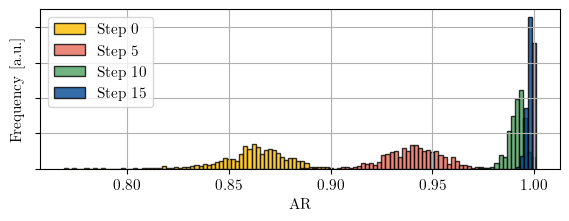

In [ ]:
data_path = "../../results/MaxCut/ER/100v/MPS_fix_dt/ising_graph0_triangular_chi128_shuffle/results.h5"
gurobi_path = os.path.join("../..", "gurobi_results", "MaxCut", "ER", "100v", "gurobi_costs.csv")
gurobi_cost = pandas.read_csv(gurobi_path).iloc[0]

with h5py.File(data_path, "r") as data:
    samples = data["energy_samples"][:] / gurobi_cost.item()
    

# for each row, plot histogram of the values in that row in a single figure
fig, ax = plt.subplots(1, 1)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for idx, i in enumerate(range(0, 17, 5)):
    print(i)
    color = colors[::-1][idx % len(colors)]
    min_val = samples[i, :].min()
    max_val = samples[i, :].max()
    bins = np.arange(min_val, max_val + 0.002, 0.002)  # binwidth of 0.01
    ax.hist(samples[i, :], bins=bins, density=True, alpha=.8, edgecolor='black', label=f"Step {i}", color=color)
ax.set_xlabel("AR")
ax.set_ylabel("Frequency [a.u.]")
ax.set_yticklabels([])

ax.grid(True)
ax.legend()

fig.set_size_inches(set_size(width='full', fraction=1, subplots=(1, 1), squeeze_height=0.5))

# Save
fig.savefig("paper_figures/energy_histogram.pdf", bbox_inches='tight')

# Entanglement entropy

Text(0.5, 0, 'Step')

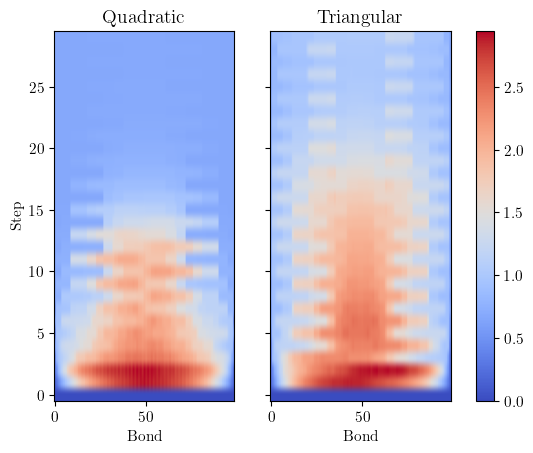

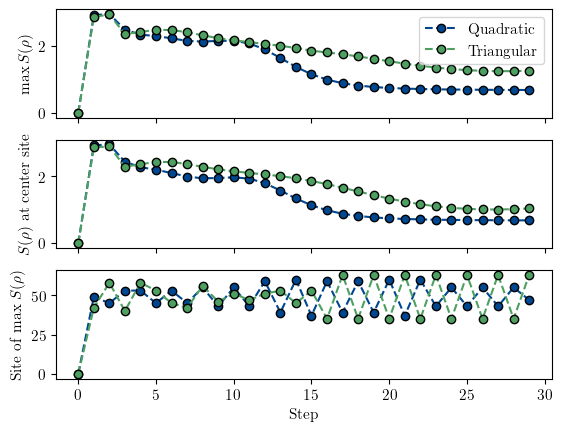

In [ ]:
ee_vals_quadratic = pandas.read_csv("entanglement_entropy_matrix_quadratic_sk_model.csv", header=None, skiprows=1).to_numpy()
ee_vals_triangular = pandas.read_csv("entanglement_entropy_matrix_triangular_sk_model.csv", header=None, skiprows=1).to_numpy()

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax[0].imshow(ee_vals_quadratic, aspect='auto', origin='lower', cmap='coolwarm')
im = ax[1].imshow(ee_vals_triangular, aspect='auto', origin='lower', cmap='coolwarm')
fig.colorbar(im, ax=ax)
ax[0].set_xlabel("Bond")
ax[1].set_xlabel("Bond")

ax[0].set_ylabel("Step")
ax[0].set_title("Quadratic")
ax[1].set_title("Triangular")

# Get maximum entanglement entropy and plot vs step
fig, ax = plt.subplots(3, 1, sharex=True)

max_ee_quadratic = ee_vals_quadratic.max(axis=1)
max_ee_triangular = ee_vals_triangular.max(axis=1)
ax[0].plot(max_ee_quadratic, marker="o", linestyle="--", markeredgecolor="black")
ax[0].plot(max_ee_triangular, marker="o", linestyle="--", markeredgecolor="black")
ax[0].set_ylabel(r"$\max S(\rho)$")
#ax[0].set_xlabel("Step")
ax[0].legend(["Quadratic", "Triangular"])
#plt.grid()

# Get entanglement entropy at center and plot vs step
center_site = ee_vals_quadratic.shape[1] // 2
center_ee_quadratic = ee_vals_quadratic[:, center_site]
center_ee_triangular = ee_vals_triangular[:, center_site]
ax[1].plot(center_ee_quadratic, marker="o", linestyle="--", markeredgecolor="black")
ax[1].plot(center_ee_triangular, marker="o", linestyle="--", markeredgecolor="black")
ax[1].set_ylabel(r"$S(\rho)$ at center site")
#ax[1].set_xlabel("Step")

# Get site of maximum entanglement entropy and plot vs step
max_ee_site_quadratic = ee_vals_quadratic.argmax(axis=1)
max_ee_site_triangular = ee_vals_triangular.argmax(axis=1)

ax[2].plot(max_ee_site_quadratic, marker="o", linestyle="--", markeredgecolor="black")
ax[2].plot(max_ee_site_triangular, marker="o", linestyle="--", markeredgecolor="black")
ax[2].set_ylabel("Site of max $S(\\rho)$")
ax[2].set_xlabel("Step")

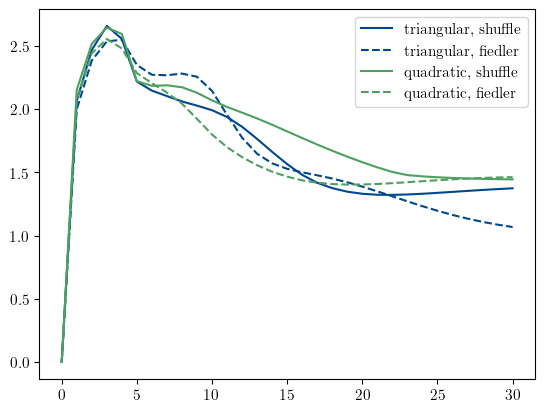

In [ ]:
chi = 128

architechtures = ["triangular", "quadratic"]
orderings = ["shuffle", "fiedler"]
graph_type = "ER"

for architecture in architechtures:
    for qubit_ordering in orderings:
        ee_vals_max_instance = pandas.DataFrame()
        for idx in range(10):
            if graph_type == "SK" and qubit_ordering == "fiedler":
                continue
            data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph0_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
            with h5py.File(data_path, "r") as data:
                ee_vals = data[f"entanglement_entropy"][:] # Shape (num_bonds, num_steps)

            ee_vals_max = ee_vals.max(axis=0) # Shape (num_steps,)
            # center bond
            #ee_vals_max = ee_vals[ee_vals.shape[0] // 2, :]

            ee_vals_max_instance[idx] = ee_vals_max

        if architecture == "quadratic":
            color = "C1"
        else:
            color = "C0"

        # Plot - / -- for fiedler, : for shuffle
        if qubit_ordering == "fiedler":
            linestyle = "--"
        else:
            linestyle = "-"

        ee_vals_max_avg = ee_vals_max_instance.mean(axis=1)
        plt.plot(ee_vals_max_avg, linestyle=linestyle, markeredgecolor="black", label=f"{architecture}, {qubit_ordering}", color=color)

plt.legend()

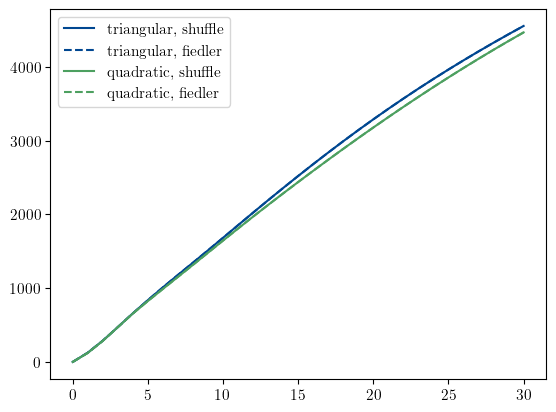

In [ ]:
chi = 128

architechtures = ["triangular", "quadratic"]
orderings = ["shuffle", "fiedler"]
graph_type = "SK"

for architecture in architechtures:
    for qubit_ordering in orderings:
        ee_vals_max_instance = pandas.DataFrame()
        aue_vals_cumsum = pandas.DataFrame()
        for idx in range(3):
            if graph_type == "SK" and qubit_ordering == "fiedler":
                continue
            data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph0_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
            with h5py.File(data_path, "r") as data:
                ee_vals = data[f"entanglement_entropy"][:] # Shape (num_bonds, num_steps)

        # Get cumsum of ee_vals along axis 1
        aue_vals = ee_vals.sum(axis=0).cumsum()


        if architecture == "quadratic":
            color = "C1"
        else:
            color = "C0"

        # Plot - / -- for fiedler, : for shuffle
        if qubit_ordering == "fiedler":
            linestyle = "--"
        else:
            linestyle = "-"

        ee_vals_max_avg = ee_vals_max_instance.mean(axis=1)
        plt.plot(aue_vals, linestyle=linestyle, markeredgecolor="black", label=f"{architecture}, {qubit_ordering}", color=color)

plt.legend()

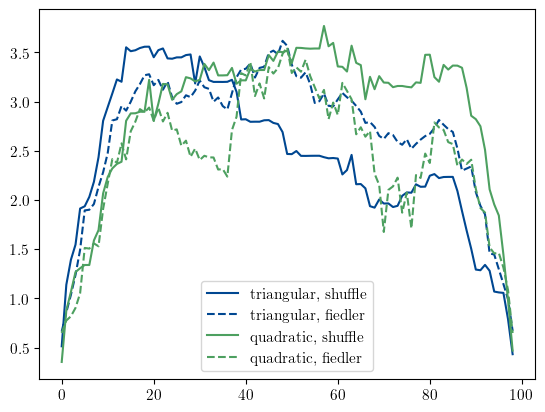

In [ ]:
chi = 128

architechtures = ["triangular", "quadratic"]
orderings = ["shuffle", "fiedler"]
graph_type = "3Reg"

for architecture in architechtures:
    for qubit_ordering in orderings:
        data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph0_{architecture}_chi{chi}_{qubit_ordering}/results.h5")
        with h5py.File(data_path, "r") as data:
            ee_vals = data[f"entanglement_entropy"][:] # Shape (num_bonds, num_steps)

        #get the step at which maximum entanglement entropy is reached, get the step not the value
        max_ee_step = ee_vals.max(axis=0).argmax()

        if architecture == "quadratic":
            color = "C1"
        else:
            color = "C0"

        # Plot - / -- for fiedler, : for shuffle
        if qubit_ordering == "fiedler":
            linestyle = "--"
        else:
            linestyle = "-"
        plt.plot(ee_vals[:, max_ee_step], linestyle=linestyle, markeredgecolor="black", label=f"{architecture}, {qubit_ordering}", color=color)

plt.legend()

In [ ]:
chi = 128

architecture = "triangular"
qubit_ordering = "shuffle"
graph_type = "ER"
idx = 0

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_triangular_chi{chi}_fiedler/results.h5")
with h5py.File(data_path, "r") as data:
    ee_vals = data[f"entanglement_entropy"][:] # Shape (num_bonds, num_steps)
    samples = data["energy_samples"][:]

print(samples.min())
axes[0, 0].imshow(ee_vals, aspect='auto', origin='lower', cmap='viridis')
axes[0, 0].set_title("triangular, fiedler\nmin energy: " + str(samples.min()))
axes[0, 0].set_xlabel("Bond")
axes[0, 0].set_ylabel("Step")
#plt.title("Entanglement Entropy Heatmap")

data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_quadratic_chi{chi}_fiedler/results.h5")
with h5py.File(data_path, "r") as data:
    ee_vals = data[f"entanglement_entropy"][:] # Shape (num_bonds, num_steps)
    samples = data["energy_samples"][:]

axes[0, 1].imshow(ee_vals, aspect='auto', origin='lower', cmap='viridis')
axes[0, 1].set_title("quadratic, fiedler\nmin energy: " + str(samples.min()))
axes[0, 1].set_xlabel("Bond")
axes[0, 1].set_ylabel("Step")

data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_triangular_chi{chi}_shuffle/results.h5")
with h5py.File(data_path, "r") as data:
    ee_vals = data[f"entanglement_entropy"][:] # Shape (num_bonds, num_steps)
    samples = data["energy_samples"][:]

axes[1, 0].imshow(ee_vals, aspect='auto', origin='lower', cmap='viridis')
axes[1, 0].set_title("triangular, shuffle\nmin energy: " + str(samples.min()))
axes[1, 0].set_xlabel("Bond")
axes[1, 0].set_ylabel("Step")

data_path = os.path.join("../..", "results", "MaxCut", graph_type, f"{Nvertices}v", "MPS_fix_dt", f"ising_graph{idx}_quadratic_chi{chi}_shuffle/results.h5")
with h5py.File(data_path, "r") as data:
    ee_vals = data[f"entanglement_entropy"][:] # Shape (num_bonds, num_steps)
    samples = data["energy_samples"][:]

axes[1, 1].imshow(ee_vals, aspect='auto', origin='lower', cmap='viridis')
axes[1, 1].set_title("quadratic, shuffle\nmin energy: " + str(samples.min()))
axes[1, 1].set_xlabel("Step")
axes[1, 1].set_ylabel("Bond")

fig.tight_layout(pad=.5)
# add a bar for the cmap

NameError: name 'plt' is not defined